# <u> Notebook </u> [_Hypothesis-2_]

In this notebook we are working on the data showing the change in rent prices in different states in Germany over the years 2022, 2023 and 2024. We will be referring to the data as ```rent_data```.  <br> The data is taken from at [Miet-check.de](https://www.miet-check.de/statistiken-bundeslaender.php). <br>

We start by importing the necessary libraries for the analysis of our data and then reading the data in ```rent_data```.  <br>  Upon close notice, some special symbols like ```(€)``` can be notice in the column names of the data. These can be removed for easier usage of column names later in the analysis. <br>  Also the spaces between the column names are replaces by and uderscore ```_``` and the upper-case letters are converted to lower-case letters for the same reason.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the necessary libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing pandas and reading the data
rent_data = pd.read_csv("data/Statewise_Rent.csv")  
rent_data 

,Federal State,Rent Price (€) 2024,Rent Price (€) 2023,Rent Price (€) 2022
0,Schleswig-Holstein,9.00,8.75,9.43
1,Hamburg,15.53,14.45,14.06
2,Lower Saxony,7.94,7.74,7.70
3,Bremen,10.48,9.38,8.88
4,North Rhine-Westphalia,9.19,8.68,8.08
5,Hesse,9.45,9.01,8.67
6,Rhineland-Palatinate,7.23,7.27,7.64
7,Baden-Württemberg,10.49,10.12,9.84
8,Bavaria,9.53,9.25,9.09
9,Saarland,8.46,7.90,7.57


In [4]:
# removing special symbols '(€)' from the column-names 
# Clean column names
rent_data.columns = (
    rent_data.columns
    .str.strip()                            # removing trailing or heading spaces (if any)
    .str.replace(r"\(€\)", "", regex=True)  # Remove (€)
    .str.replace(" ", "_")                  # Replace spaces with underscores
    .str.replace("__", "_")                 # Fix double underscores
    .str.lower()                            # Convert to lowercase
)

print(f"Column List ::\n{rent_data.columns.tolist()}")  

# Reorder columns
rent_data = rent_data[['federal_state', 'rent_price_2022', 'rent_price_2023', 'rent_price_2024']]

col_list = rent_data.columns.tolist()
print(f"\nOrdered Column List ::\n{col_list}")  

Column List ::
['federal_state', 'rent_price_2024', 'rent_price_2023', 'rent_price_2022']

Ordered Column List ::
['federal_state', 'rent_price_2022', 'rent_price_2023', 'rent_price_2024']


In [5]:
rent_data.shape

(16, 4)

In [6]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   federal_state    16 non-null     object 
 1   rent_price_2022  16 non-null     float64
 2   rent_price_2023  16 non-null     float64
 3   rent_price_2024  16 non-null     float64
dtypes: float64(3), object(1)
memory usage: 644.0+ bytes


In [7]:
rent_data.describe() 

,rent_price_2022,rent_price_2023,rent_price_2024
count,16.000000,16.000000,16.000000
mean,8.638125,8.759375,9.215000
std,2.236632,2.410390,2.746236
min,5.930000,6.060000,6.110000
25%,7.537500,7.230000,7.342500
50%,8.160000,8.290000,8.730000
75%,9.175000,9.282500,9.767500
max,14.060000,14.450000,15.530000


In [8]:
rent_data.to_csv('cleaned_rent_data.csv', index = False)

### <u>Hypothesis 2 </u> :
**Rent prices have risen faster in urban federal states like Hamburg and Berlin than others.**


- Use rent data from 2022 to 2024.

In [9]:
col_list

['federal_state', 'rent_price_2022', 'rent_price_2023', 'rent_price_2024']

In [10]:
# sorting the rent prices according to the year 2024.
rent_sorted = rent_data.sort_values("rent_price_2024", ascending = True)
rent_sorted 

,federal_state,rent_price_2022,rent_price_2023,rent_price_2024
14,Saxony-Anhalt,6.10,6.06,6.11
15,Thuringia,6.45,6.51,6.57
13,Saxony,5.93,6.23,6.64
6,Rhineland-Palatinate,7.64,7.27,7.23
12,Mecklenburg-Western Pomerania,7.44,7.11,7.38
2,Lower Saxony,7.70,7.74,7.94
11,Brandenburg,8.24,7.84,8.22
9,Saarland,7.57,7.90,8.46
0,Schleswig-Holstein,9.43,8.75,9.00
4,North Rhine-Westphalia,8.08,8.68,9.19


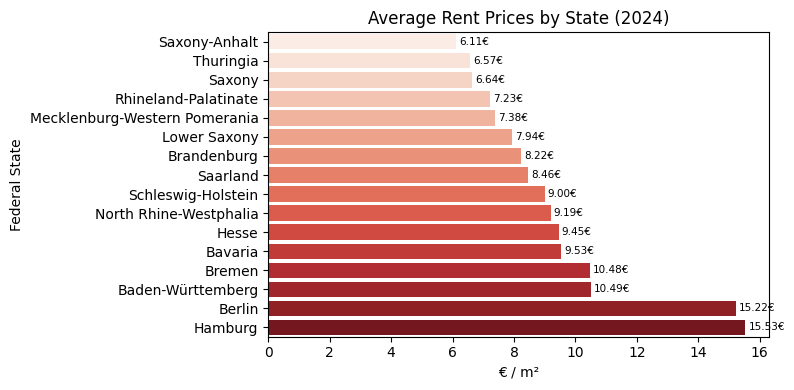

In [11]:
# plotting just for the year 2024. 
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    y="federal_state", 
    x="rent_price_2024", 
    data=rent_sorted, 
    palette="Reds"
                )      

# Add value labels on the bars
for patch in ax.patches:
    value = patch.get_width()  # bar length (rent value)
    y = patch.get_y() + patch.get_height() / 2  # vertical center
    ax.text(value + 0.1, y, f"{value:.2f}€", va='center', fontsize=7.5)

# Plotting 
plt.title("Average Rent Prices by State (2024)")
plt.xlabel("€ / m²")
plt.ylabel("Federal State")
plt.tight_layout()
plt.show()


- Calculate % increase over the years.
- Possible Insight:
- Urban areas may see sharper cost-of-living issues, leading to greater rent burden.

In [12]:
# Step 1: Calculate % increase
rent_data['percent_increase'] = (((rent_data['rent_price_2024'] - rent_data['rent_price_2022']) / 
                                   rent_data['rent_price_2022']) * 100).round(2)

# Step 2: Flag urban states
urban_states = ['Berlin', 'Hamburg', 'Bremen']  # defining Urban-states

rent_data['urban'] = rent_data['federal_state'].isin(urban_states)  # new column check whether
                                                                    # a state is urban or not.

rent_data 

,federal_state,rent_price_2022,rent_price_2023,rent_price_2024,percent_increase,urban
0,Schleswig-Holstein,9.43,8.75,9.00,-4.56,False
1,Hamburg,14.06,14.45,15.53,10.46,True
2,Lower Saxony,7.70,7.74,7.94,3.12,False
3,Bremen,8.88,9.38,10.48,18.02,True
4,North Rhine-Westphalia,8.08,8.68,9.19,13.74,False
5,Hesse,8.67,9.01,9.45,9.00,False
6,Rhineland-Palatinate,7.64,7.27,7.23,-5.37,False
7,Baden-Württemberg,9.84,10.12,10.49,6.61,False
8,Bavaria,9.09,9.25,9.53,4.84,False
9,Saarland,7.57,7.90,8.46,11.76,False


#### <u>Observations from Data</u> :
- Negative values in ```percent_increase``` depicts that the rent prices are decreasing in that state between the years 2022 and 2024.
- Urban states like ```Berlin```, ```Hamburg```, ```Bremen``` show high positive increases, which supports our hypothesis.
- Some rural states also show increases (e.g. ```Saxony```, ```NRW```); but on average, urban areas have faster rent growth.
- A few states show declines (e.g. ```Schleswig-Holstein```, ```Rhineland-Palatinate```, ```Brandenburg	```, ```MWP```), this could be due to possible overbuilding of houses or shrinking of population in those states.



These observations are more clearly  showcased wih the help of visualization below ::

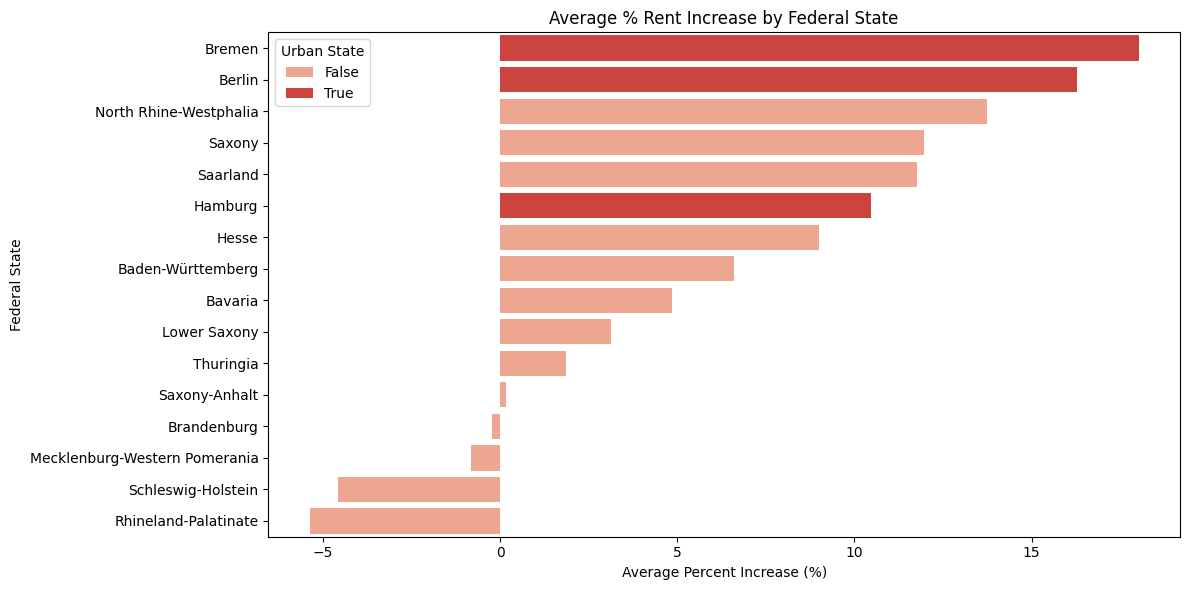

In [13]:
# Step 3: Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=rent_data.sort_values('percent_increase', ascending=False),
            x='percent_increase', y='federal_state', hue='urban', dodge=False, palette='Reds')

plt.title('Average % Rent Increase by Federal State')
plt.xlabel('Average Percent Increase (%)')
plt.ylabel('Federal State')
plt.legend(title='Urban State')
plt.tight_layout()
plt.show()

We can also use ```Pie-Chart``` to visualize the _**"average percent increase by group (urban vs. non-urban)"**_.  this helps us see how much on average, the rent increased in urban vs. non-urban areas.

Grouped Data :: 
 urban
False     4.01
True     14.92
Name: percent_increase, dtype: float64


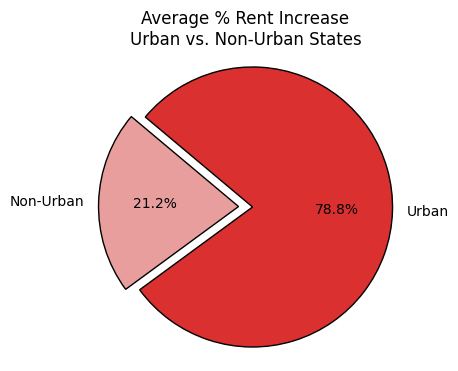

In [14]:
# Group by 'urban' and calculate average percent increase
grouped_data = rent_data.groupby('urban')['percent_increase'].mean().round(2)
print('Grouped Data :: \n', grouped_data)

# Labels
labels = ['Non-Urban', 'Urban']

# Explode urban slice to highlight it
explode = (0, 0.1)  # (Non-Urban, Urban)

# Plot
plt.figure(figsize=(4, 4))
plt.pie(grouped_data, labels=labels, autopct='%1.1f%%', colors=["#e79494e6", "#d71b1be8"], 
        startangle=140, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Average % Rent Increase\nUrban vs. Non-Urban States')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


Observation from Pie-Chart is that the _**"Urban areas account for 78.8% of the total average rent increase across both groups."**_

Grouped Data :: 
 urban
False     4.01
True     14.92
Name: percent_increase, dtype: float64


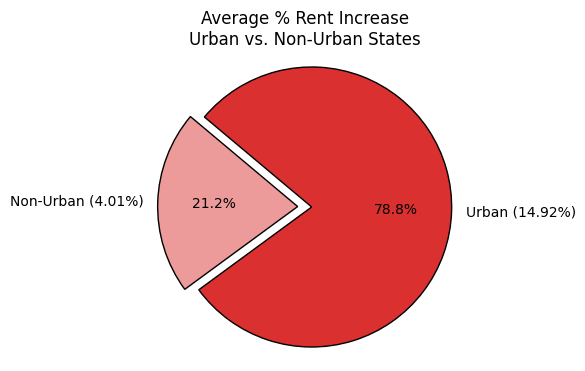

In [15]:
# Group by 'urban' and calculate average percent increase
grouped_data = rent_data.groupby('urban')['percent_increase'].mean().round(2)
print('Grouped Data :: \n', grouped_data)

# Labels
labels = [f'Non-Urban ({grouped_data[False]}%)', f'Urban ({grouped_data[True]}%)']

# Explode urban slice to highlight it
explode = (0, 0.1)  # (Non-Urban, Urban)

# Plot
plt.figure(figsize=(4, 4))
plt.pie(grouped_data, labels=labels, autopct='%1.1f%%', colors=["#eb8f8fe6", "#d71b1be8"], 
        startangle=140, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Average % Rent Increase\nUrban vs. Non-Urban States')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

Grouped Data for Urban and Non-Urban states :: 
       urban  percent_increase
0  Non-Urban              4.01
1      Urban             14.92


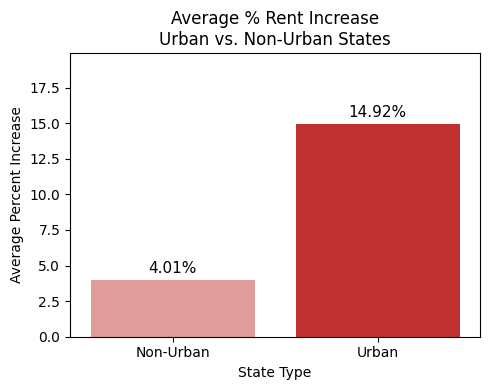

In [16]:
# Using a Grouped bar-chart-----------

# Step 1: Compute average percent increase for each group
grouped = rent_data.groupby('urban')['percent_increase'].mean().round(2).reset_index()

# Step 2: Replace boolean with meaningful labels
grouped['urban'] = grouped['urban'].map({True: 'Urban', False: 'Non-Urban'})
print(f"Grouped Data for Urban and Non-Urban states :: \n{grouped}")

# Step 3: Plot
plt.figure(figsize=(5, 4))
sns.barplot(data=grouped, x='urban', y='percent_increase', palette=["#eb8f8fe6", "#d71b1be8"])

# Add value labels
for i, row in grouped.iterrows():
    plt.text(i, row['percent_increase'] + 0.5, f"{row['percent_increase']}%", ha='center', fontsize=11)

# Labels and Title
plt.title('Average % Rent Increase\nUrban vs. Non-Urban States')
plt.xlabel('State Type')
plt.ylabel('Average Percent Increase')
plt.ylim(0, grouped['percent_increase'].max() + 5)
plt.tight_layout()
plt.show()


### <u>Conclusion</u> :
_**"Urban federal states in Germany experienced significantly higher rent increases between 2022 and 2024 compared to non-urban states"**_.  

This supports our Hypothesis that _**Urban areas are facing higher/more cost-of-living pressure**_. the possible reason for this could be higher demand of houses (high population density) with limited housing supply and greater economic centralization.

#### <u>Policy Implications</u> :
An urgent need for targeted housing policies in urban regions — such as:
- Expanding affordable housing supply,
- Implementing rental caps or controls where appropriate,
- Incentivizing development in underutilized areas,
- Supporting decentralized urban planning to reduce pressure on core cities.

Without these reforms, the rent burden in urban areas risks widening socio-economic inequality and displacing lower- to middle-income residents.